In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import clean,to_radian,hann,res_to_rad
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd
from mask import sphere_mask
from Bessel_Interp import bessel_cost_func,bessel_rotate,generate_hann_windowed_bessel_interpolation
from Bessel_Interp import hann_windowed_bessel_halton_in_circ_cost_func, bessel_halton_in_circ_cost_func

In [4]:
# load in data
data_dict_head = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/data_dict_head.p','rb'))

#Linear Interpolation

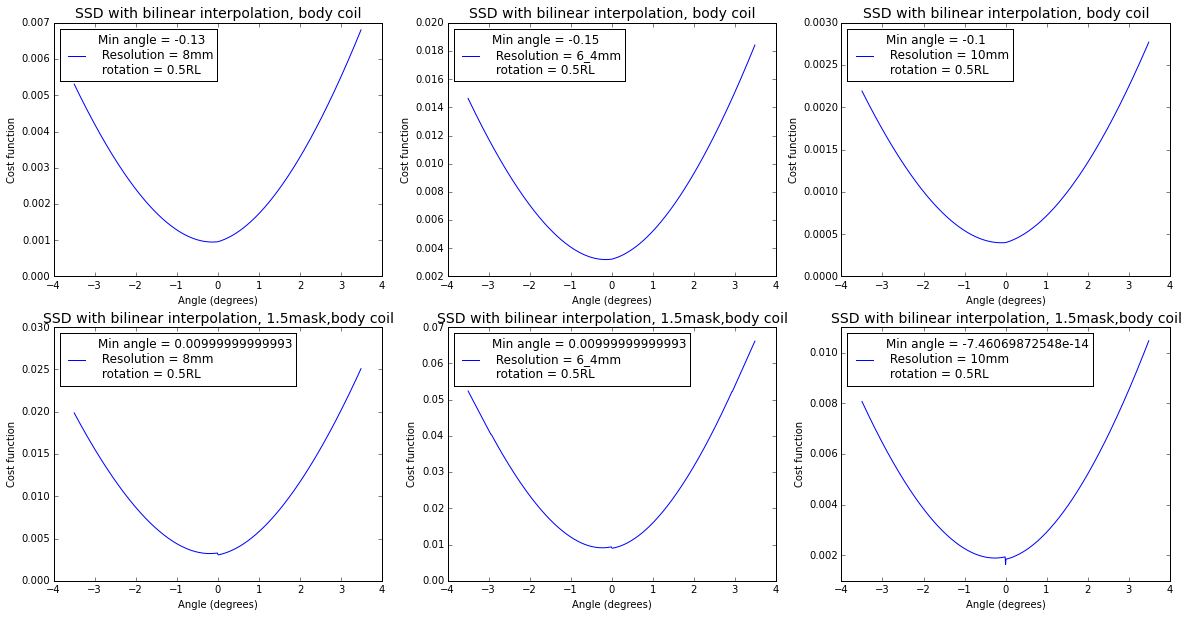

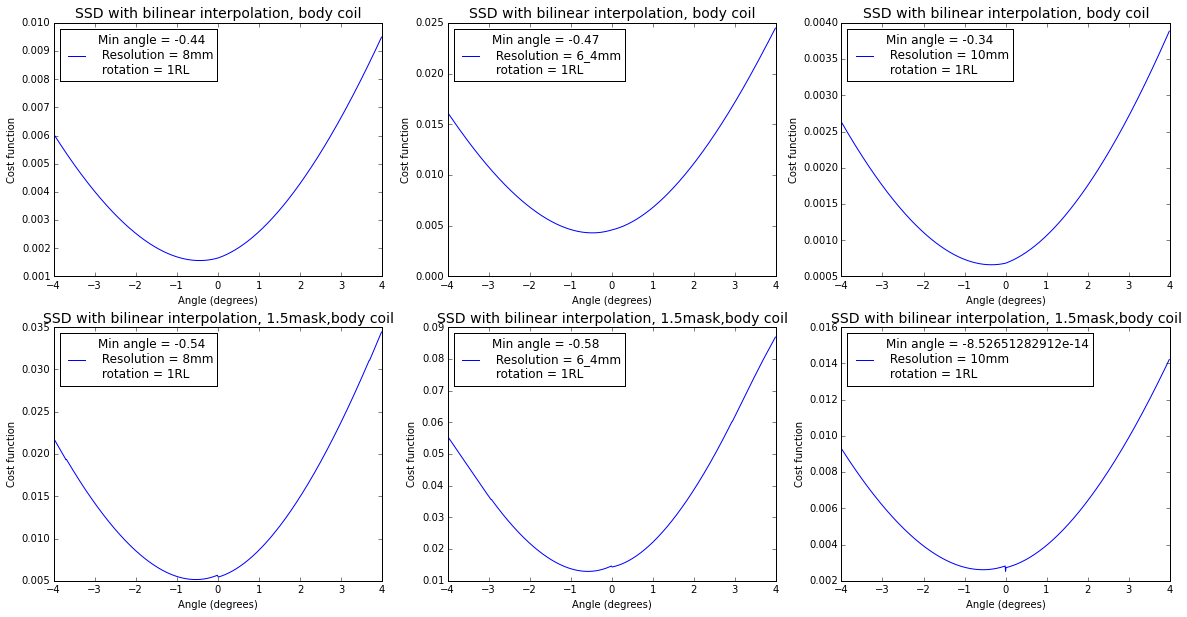

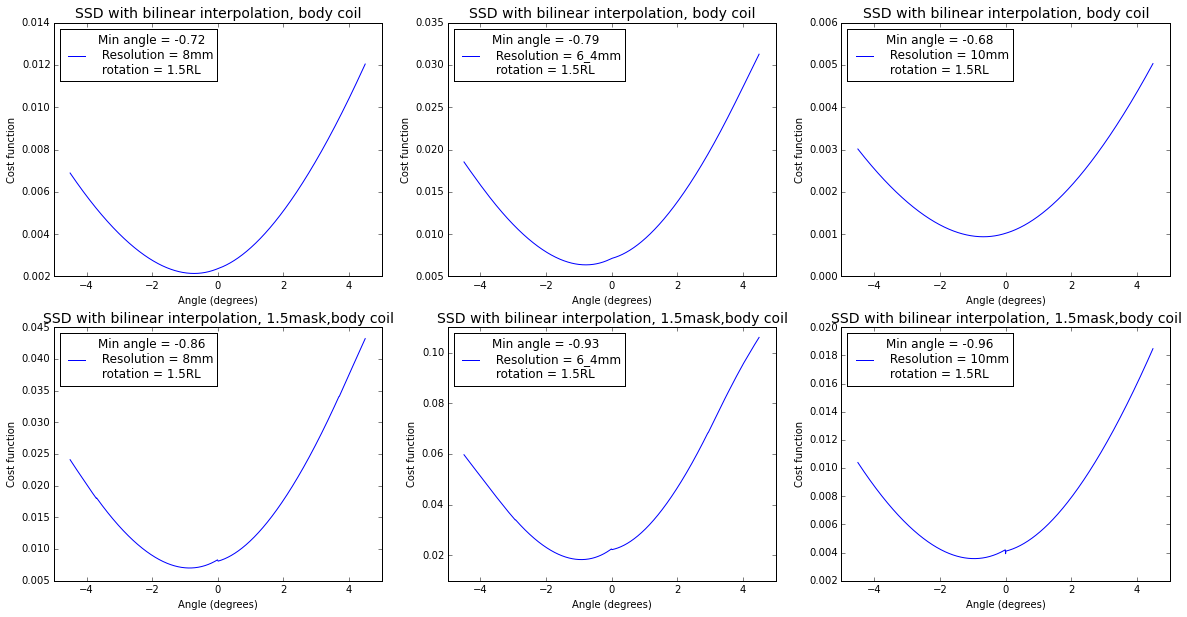

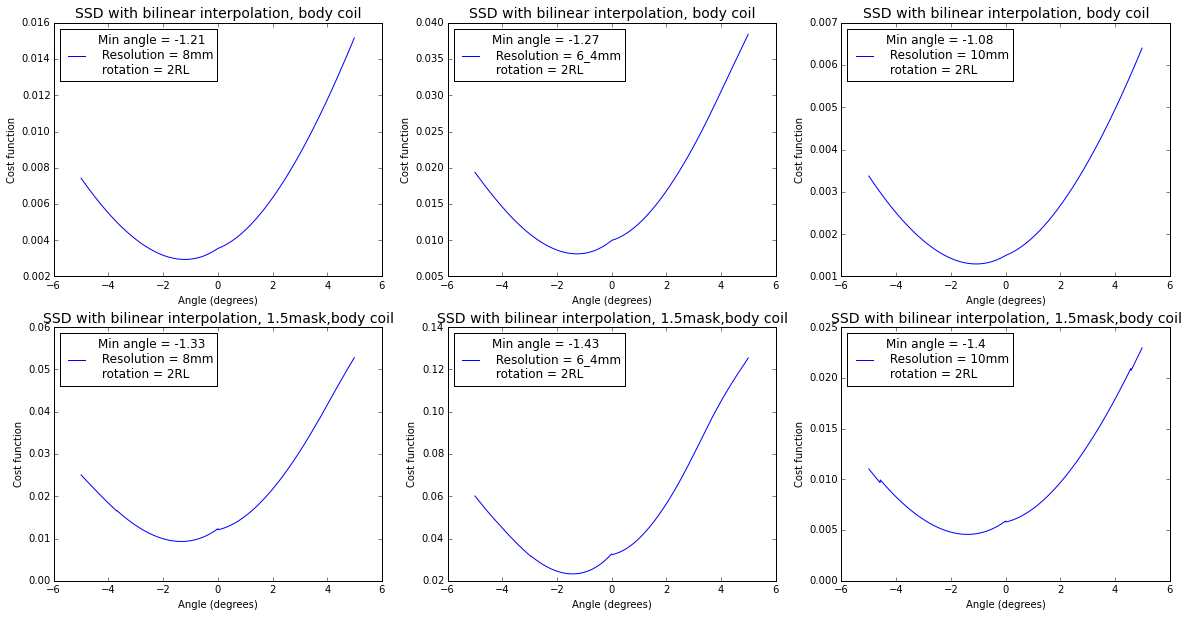

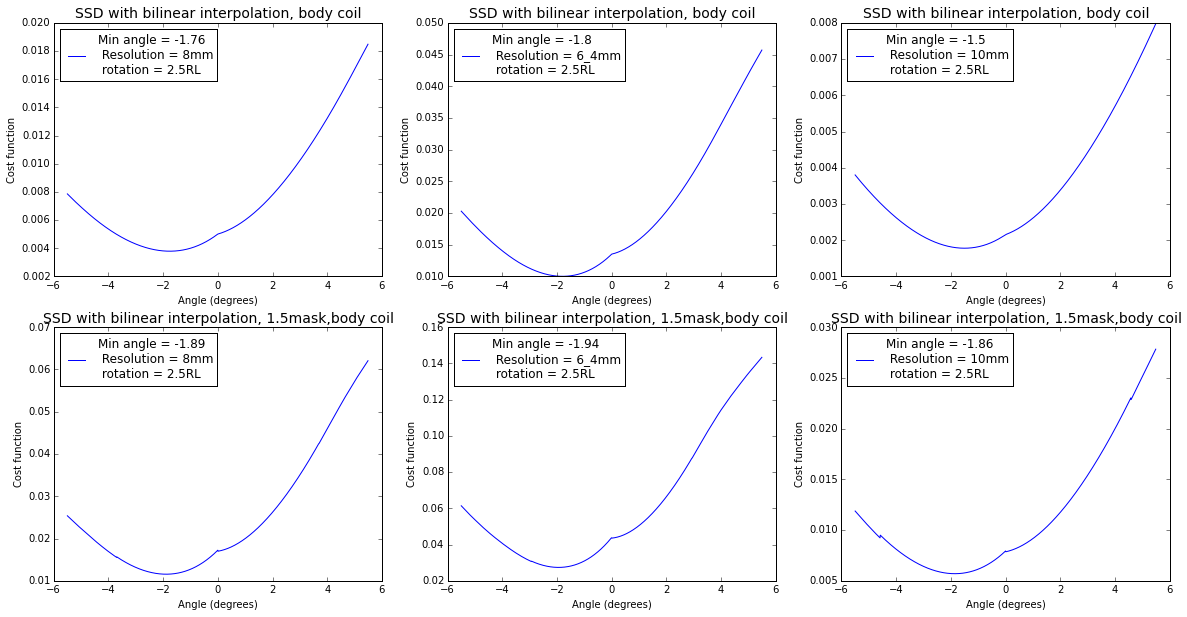

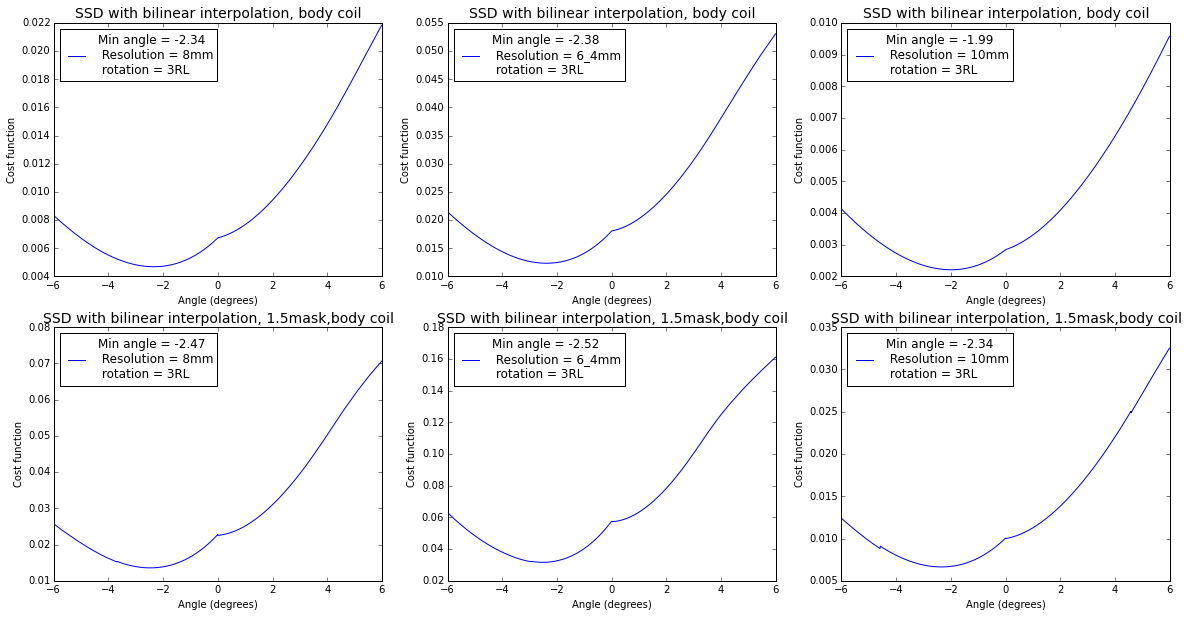

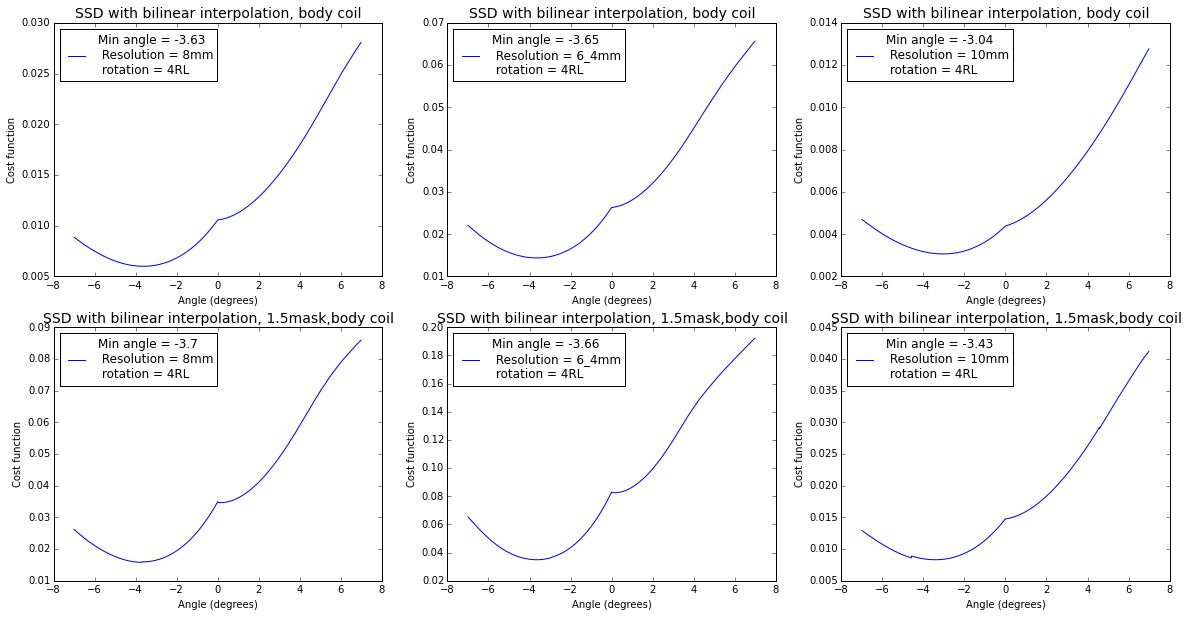

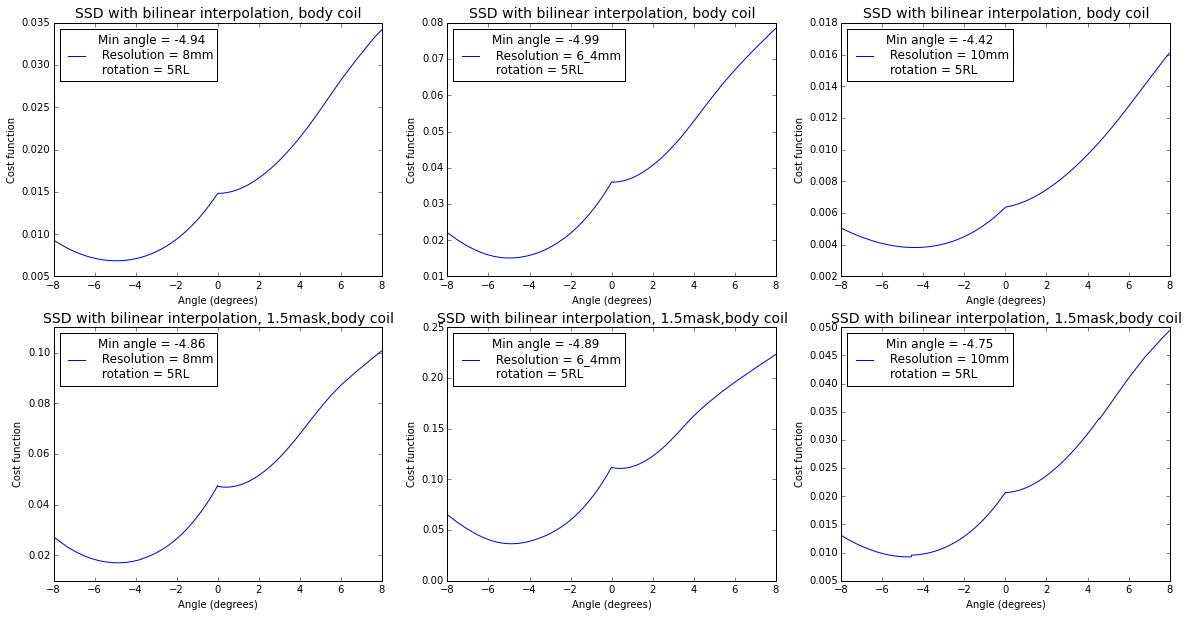

In [34]:
# Run 1
linear_head_run1 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/linear_head.p','rb'))
linear_head_run1_15 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/linear_head_1_5.p','rb'))
rotations = ['0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
for rot in rotations:
    d = float(rot[:-2])
    thetas = np.arange(-d-3,d+3,0.01)
    plt.figure(figsize=[20,10])
    for i in xrange(len(linear_head_run1)):
        res = linear_head_run1[i].keys()[0]
        plt.subplot(2,3,i+1)
        plot_cost_func(thetas, linear_head_run1[i][res][rot], res, 'bilinear', rot, 'body')
        plt.subplot(2,3,i+4)
        plot_cost_func(thetas, linear_head_run1_15[i][res][rot], res, 'bilinear', rot, '1.5mask,body')
    plt.show()

In [ ]:
# Run 2
linear_head_run2 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/linear_head2.p','rb'))
linear_head_run2_15 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/linear_head2_1_5.p','rb'))
rotations = ['0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
for rot in rotations:
    d = float(rot[:-2])
    thetas = np.arange(-d-3,d+3,0.01)
    plt.figure(figsize=[20,10])
    for i in xrange(len(linear_head_run1)):
        res = linear_head_run1[i].keys()[0]
        plt.subplot(2,3,i+1)
        plot_cost_func(thetas, linear_head_run1[i][res][rot], res, 'bilinear', rot, 'body')
        plt.subplot(2,3,i+4)
        plot_cost_func(thetas, linear_head_run1_15[i][res][rot], res, 'bilinear', rot, '1.5mask,body')
    plt.show()

# Cubic Interpolation

In [ ]:
cost_head_cubic = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_cubic_run_1.p','rb'))

In [ ]:
resolutions = ['6_4mm','8mm','10mm']
for idx in xrange(len(cost_head_cubic)):
    plt.figure(figsize=[20,5])
    for i, res in enumerate(resolutions):
        rot = cost_head_cubic[idx][res].keys()[0]
        d = float(rot[:-2])
        thetas = np.arange(-d-3,-d+3,0.01)
        plt.subplot(1,3,i+1)
        plot_cost_func(thetas, cost_dict_head_r_3[idx][res][rot], res, 'cubic', rot, 'body')
    plt.show()

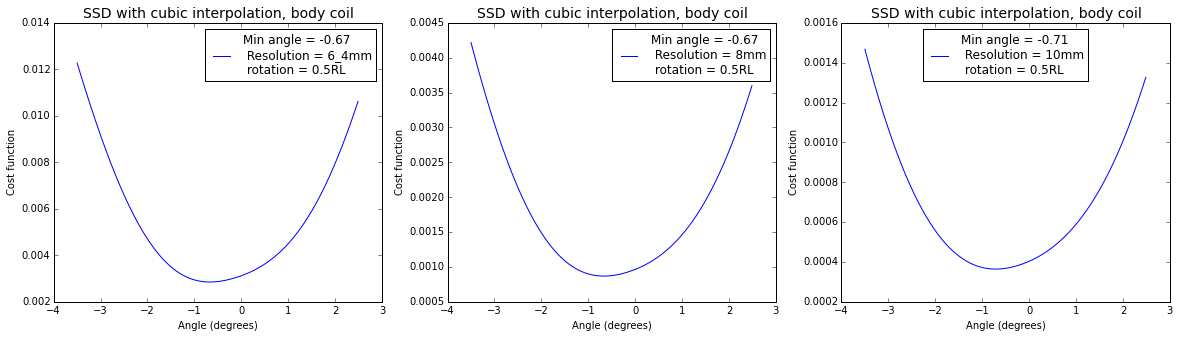

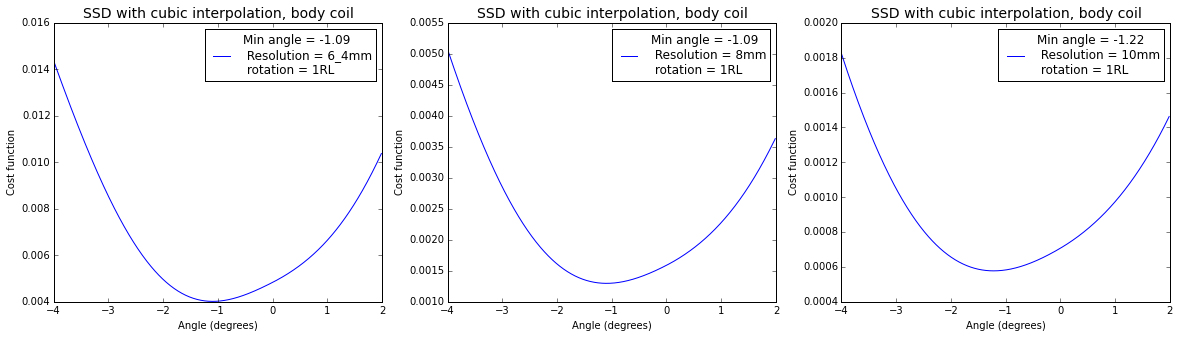

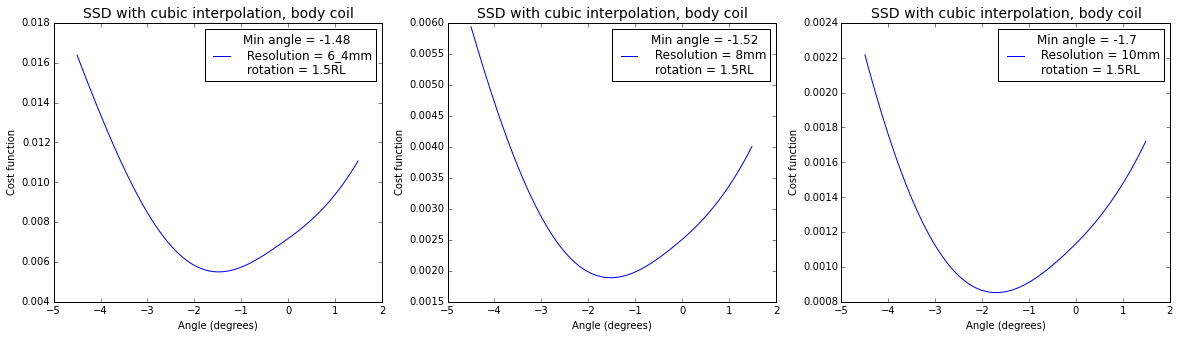

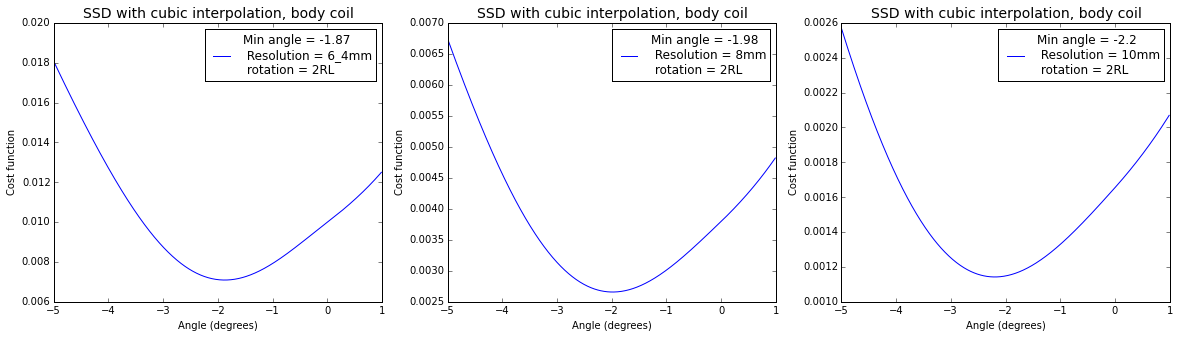

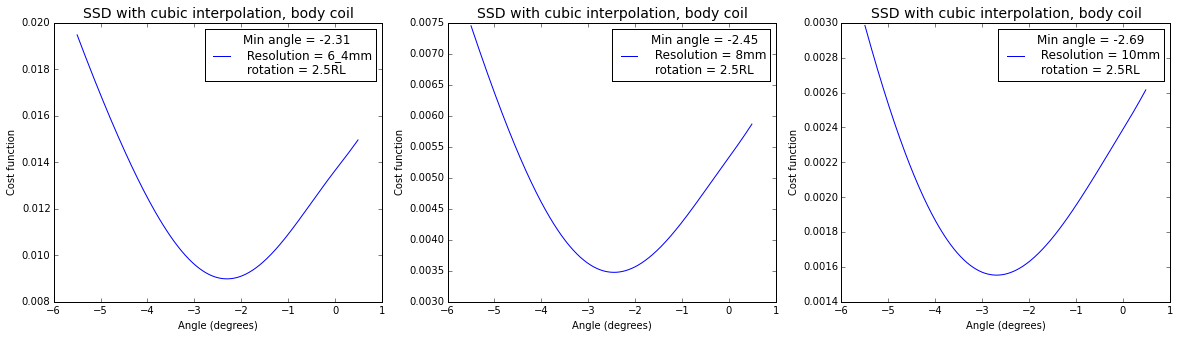

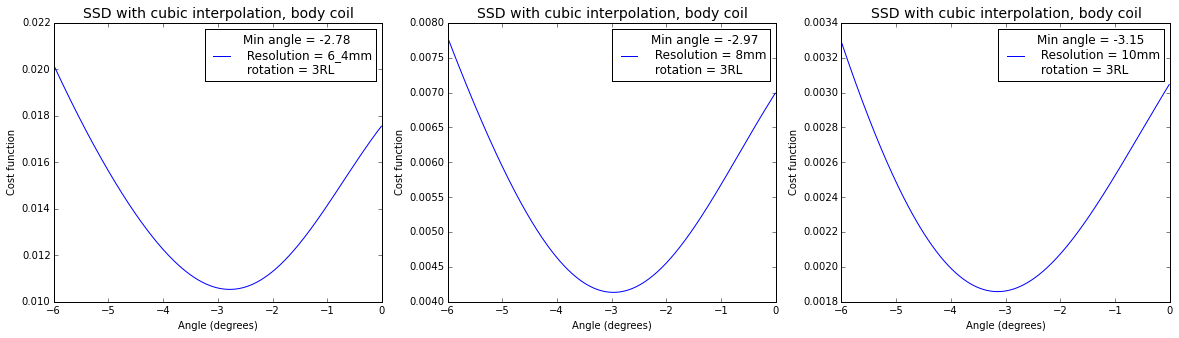

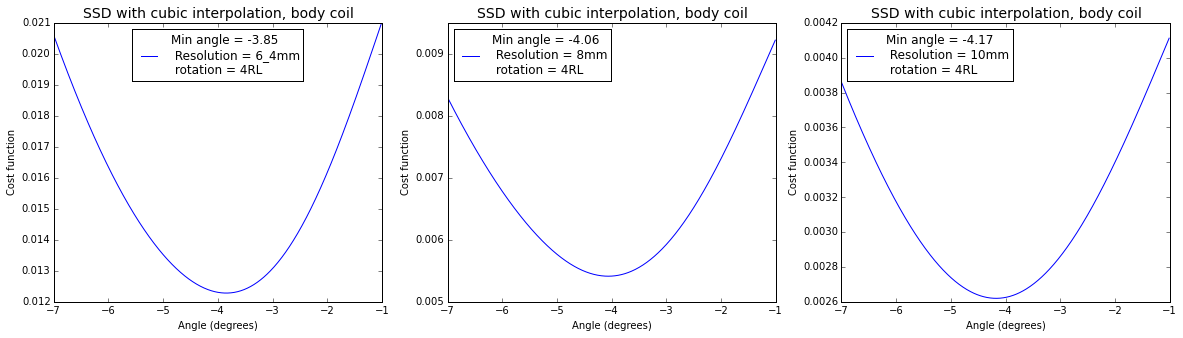

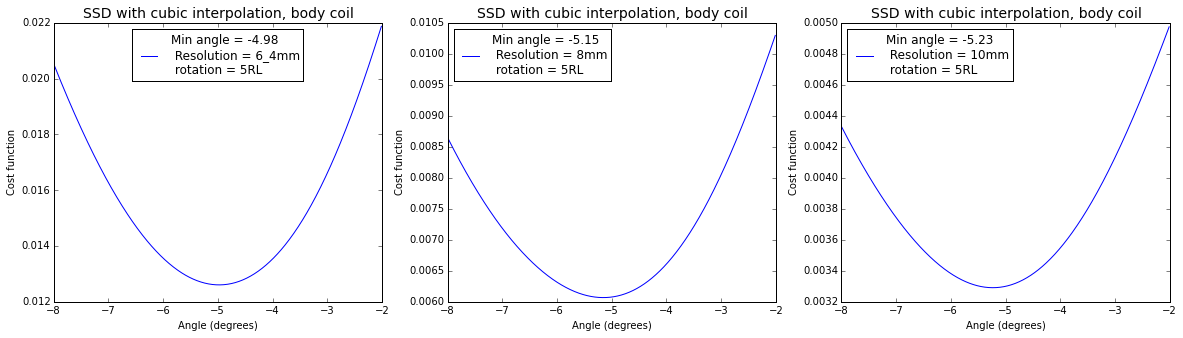

In [112]:
# Run 2
cost_head_cubic2 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_cubic_run_2.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
for idx in xrange(len(cost_head_cubic2)):
    plt.figure(figsize=[20,5])
    for i, res in enumerate(resolutions):
        rot = cost_head_cubic2[idx][res].keys()[0]
        d = float(rot[:-2])
        thetas = np.arange(-d-3,-d+3,0.01)
        plt.subplot(1,3,i+1)
        plot_cost_func(thetas, cost_head_cubic2[idx][res][rot], res, 'cubic', rot, 'body')
    plt.show()

# Bessel Interpolation on Grids

In [35]:
# hann windowed bessel with different radius 
cost_dict_head_r_3 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_r_3.p','rb'))
cost_dict_head_r_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_bessel_mask_hann4.p','rb'))
cost_dict_head_r_5 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_r_5.p','rb'))
cost_dict_head_r_6 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_r_6.p','rb'))
cost_dict_head_r_7 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/pickled_results_cluster/cost_dict_head_r_7.p','rb'))

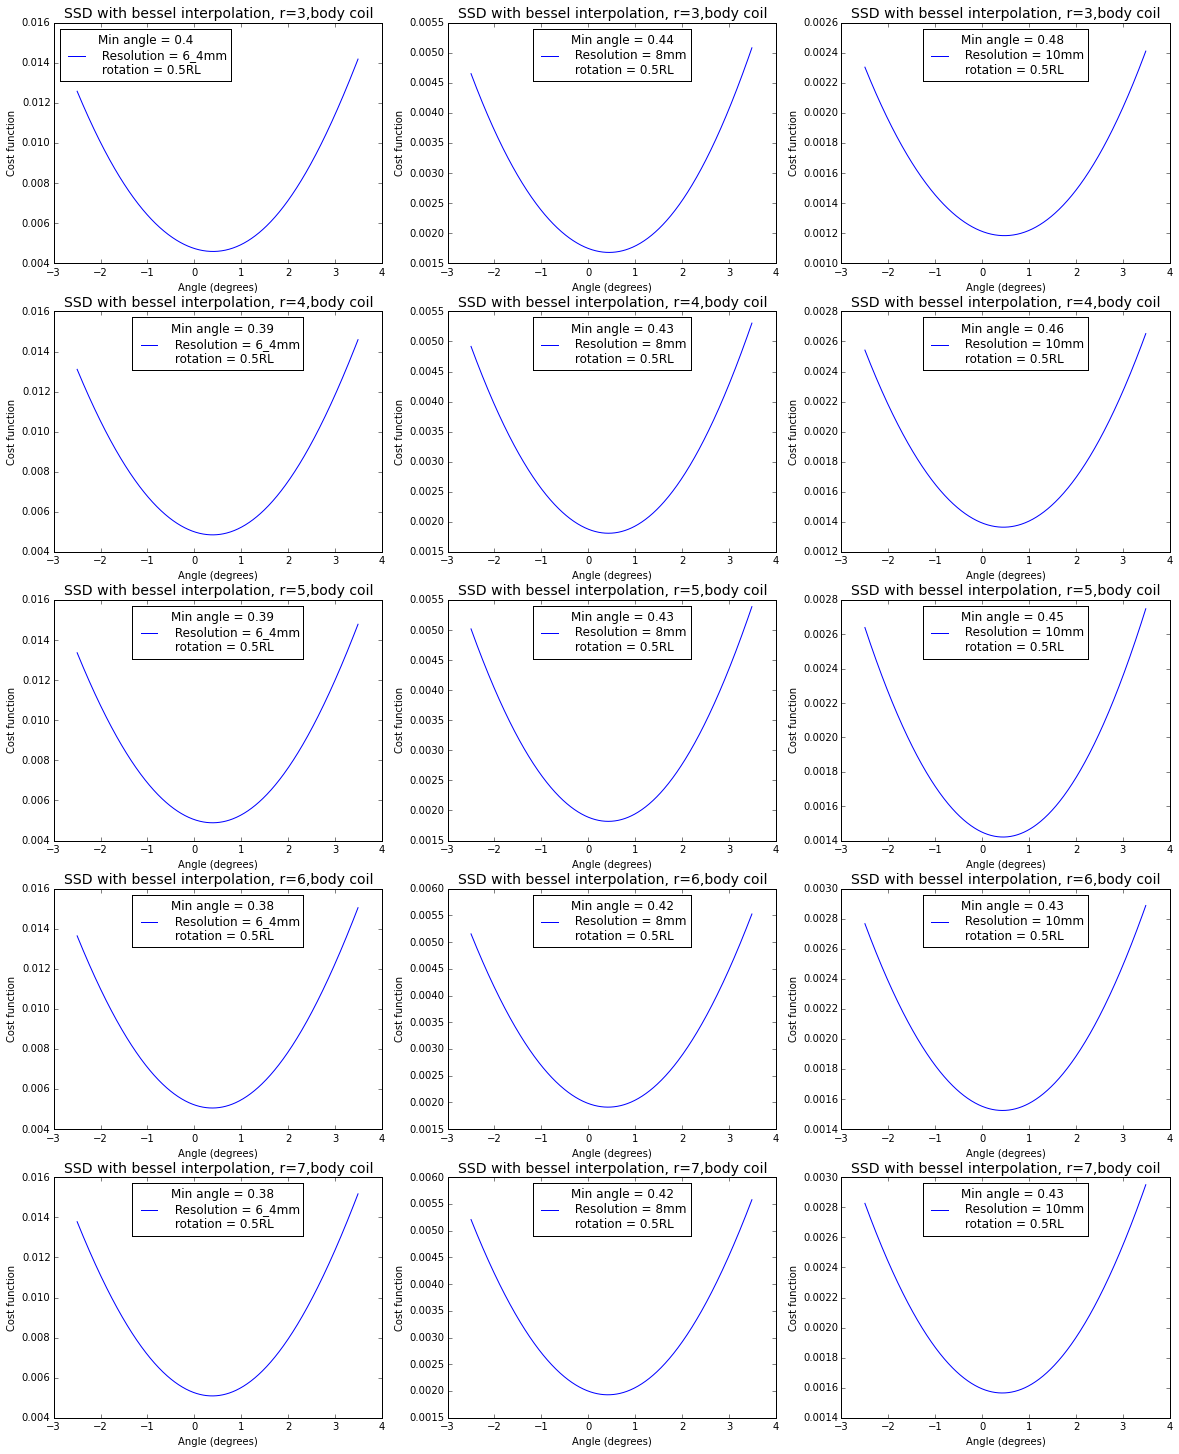

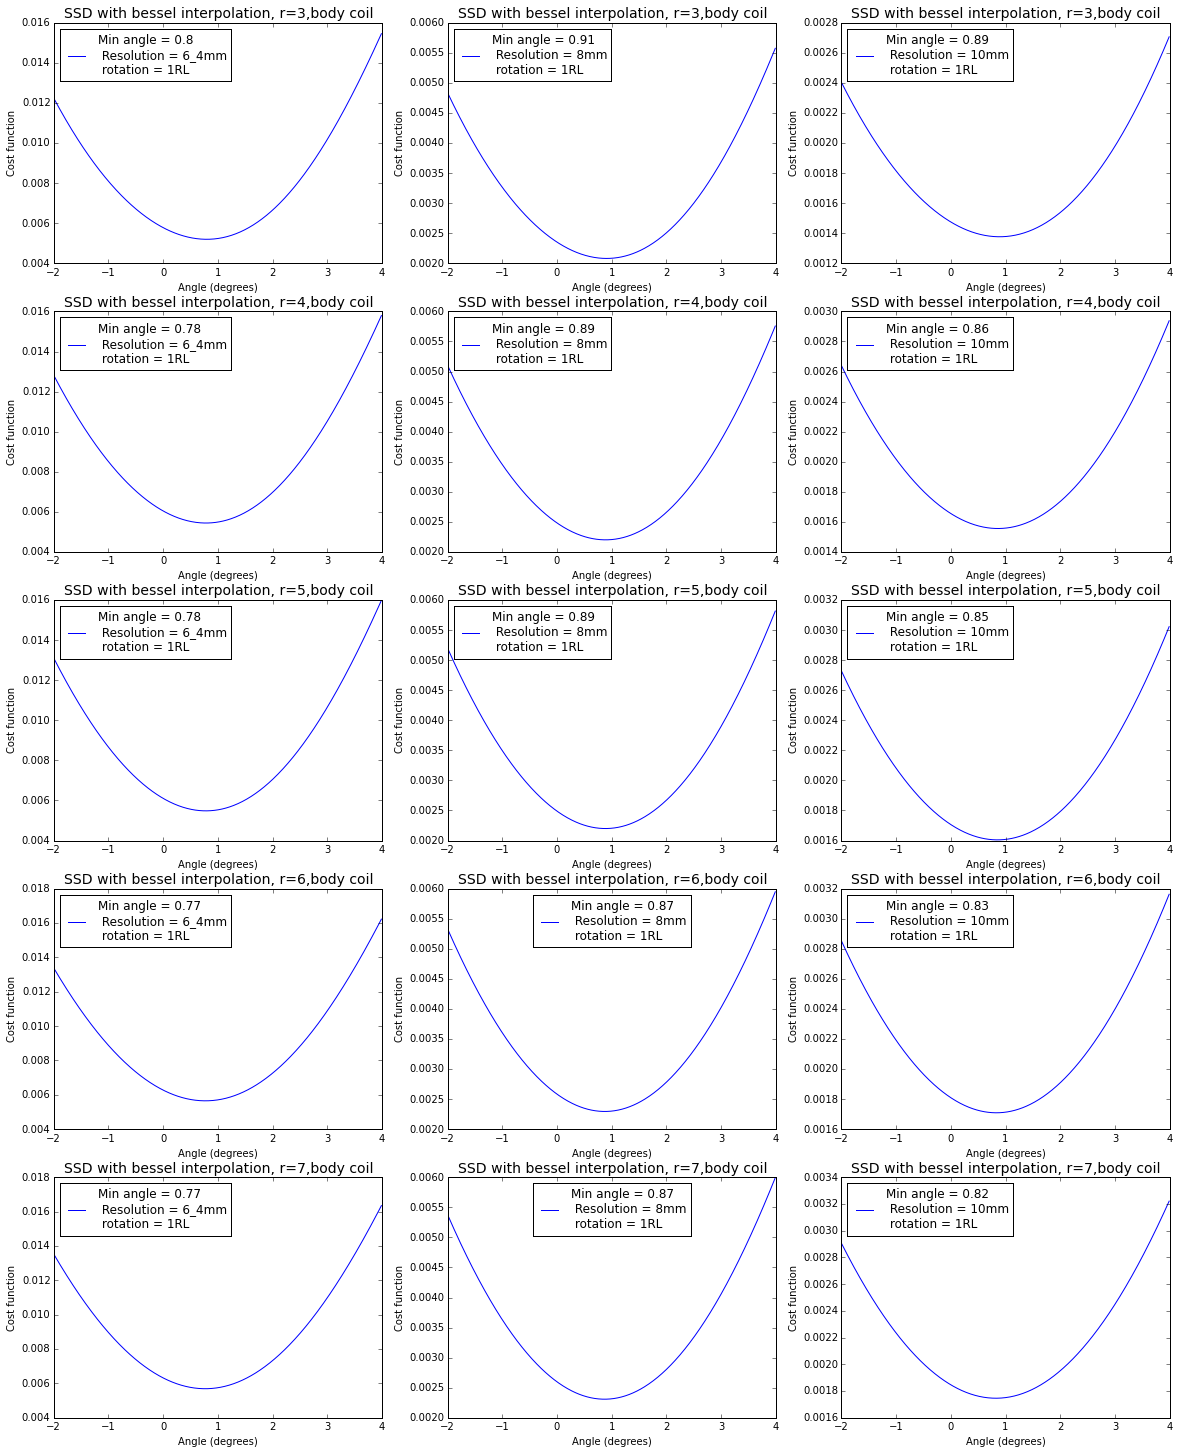

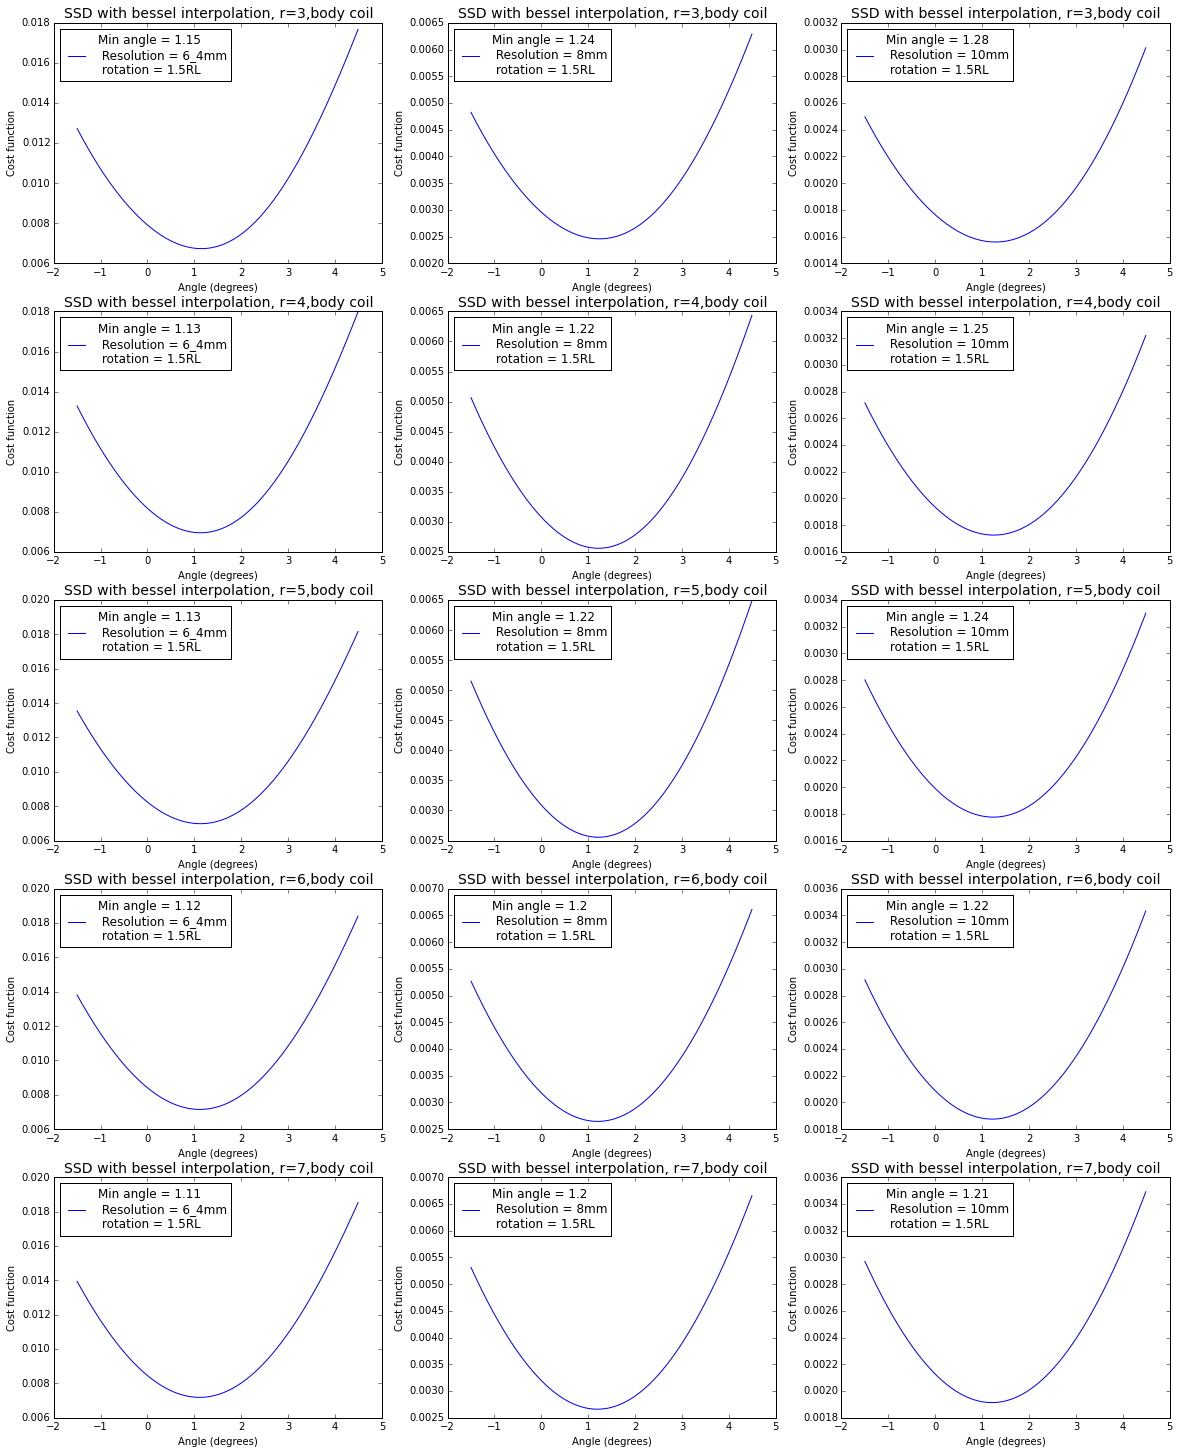

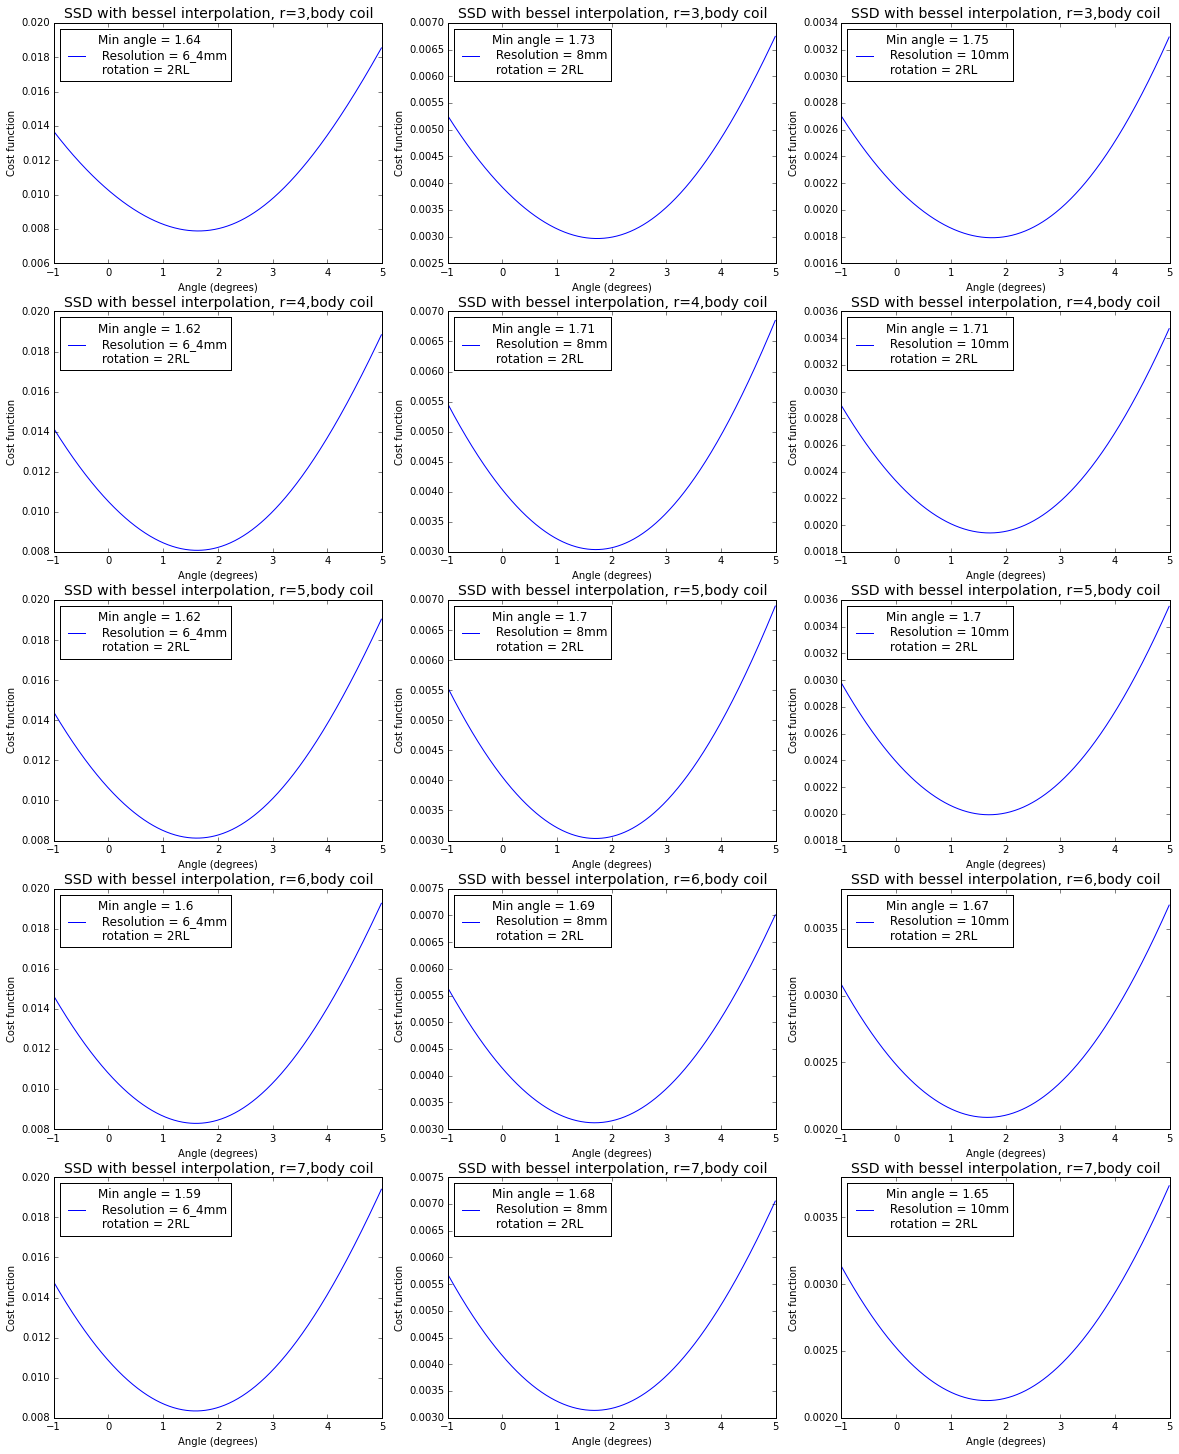

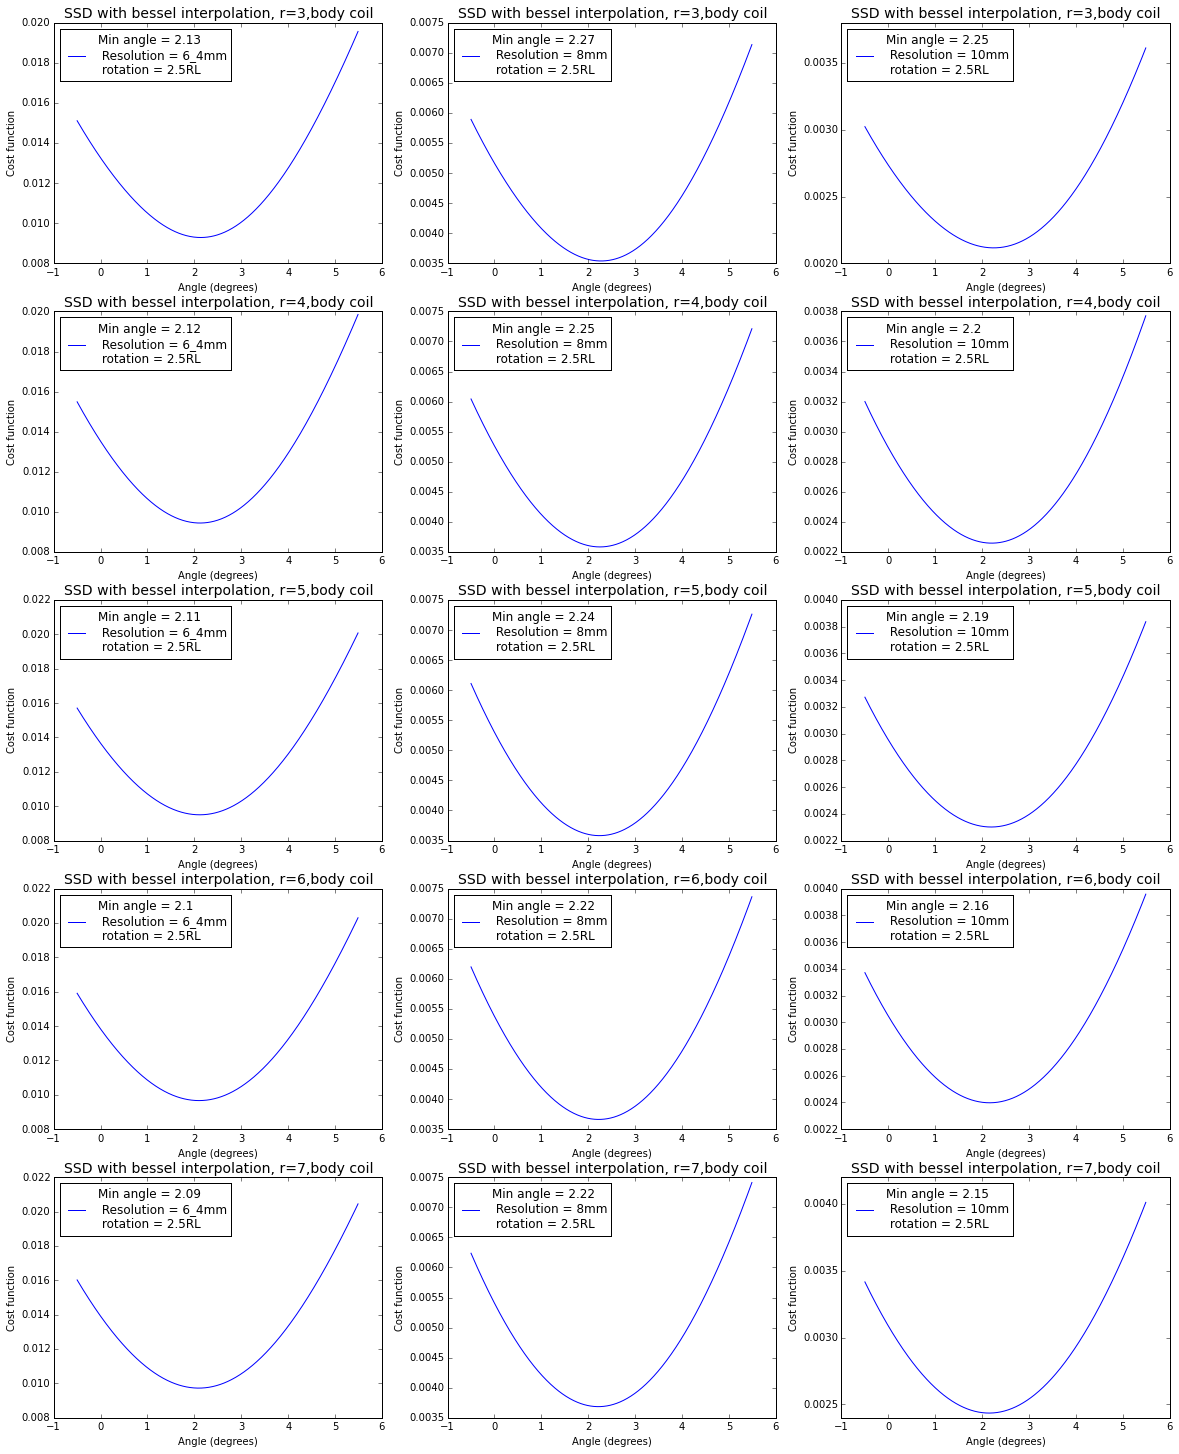

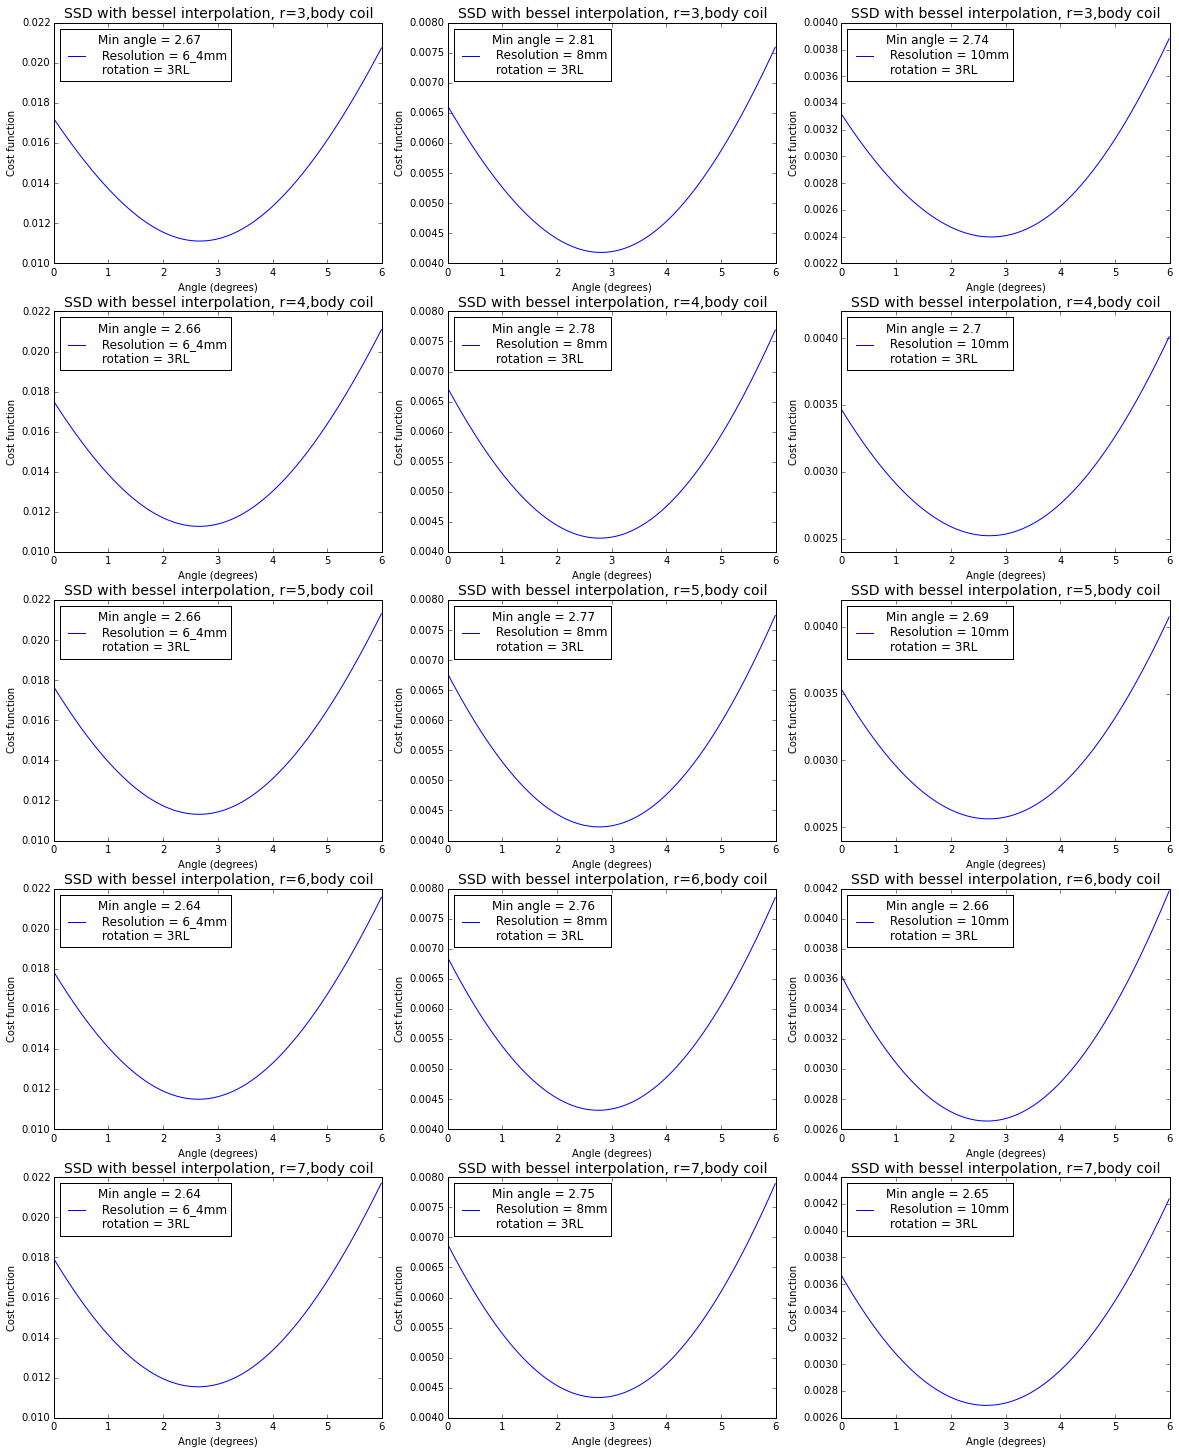

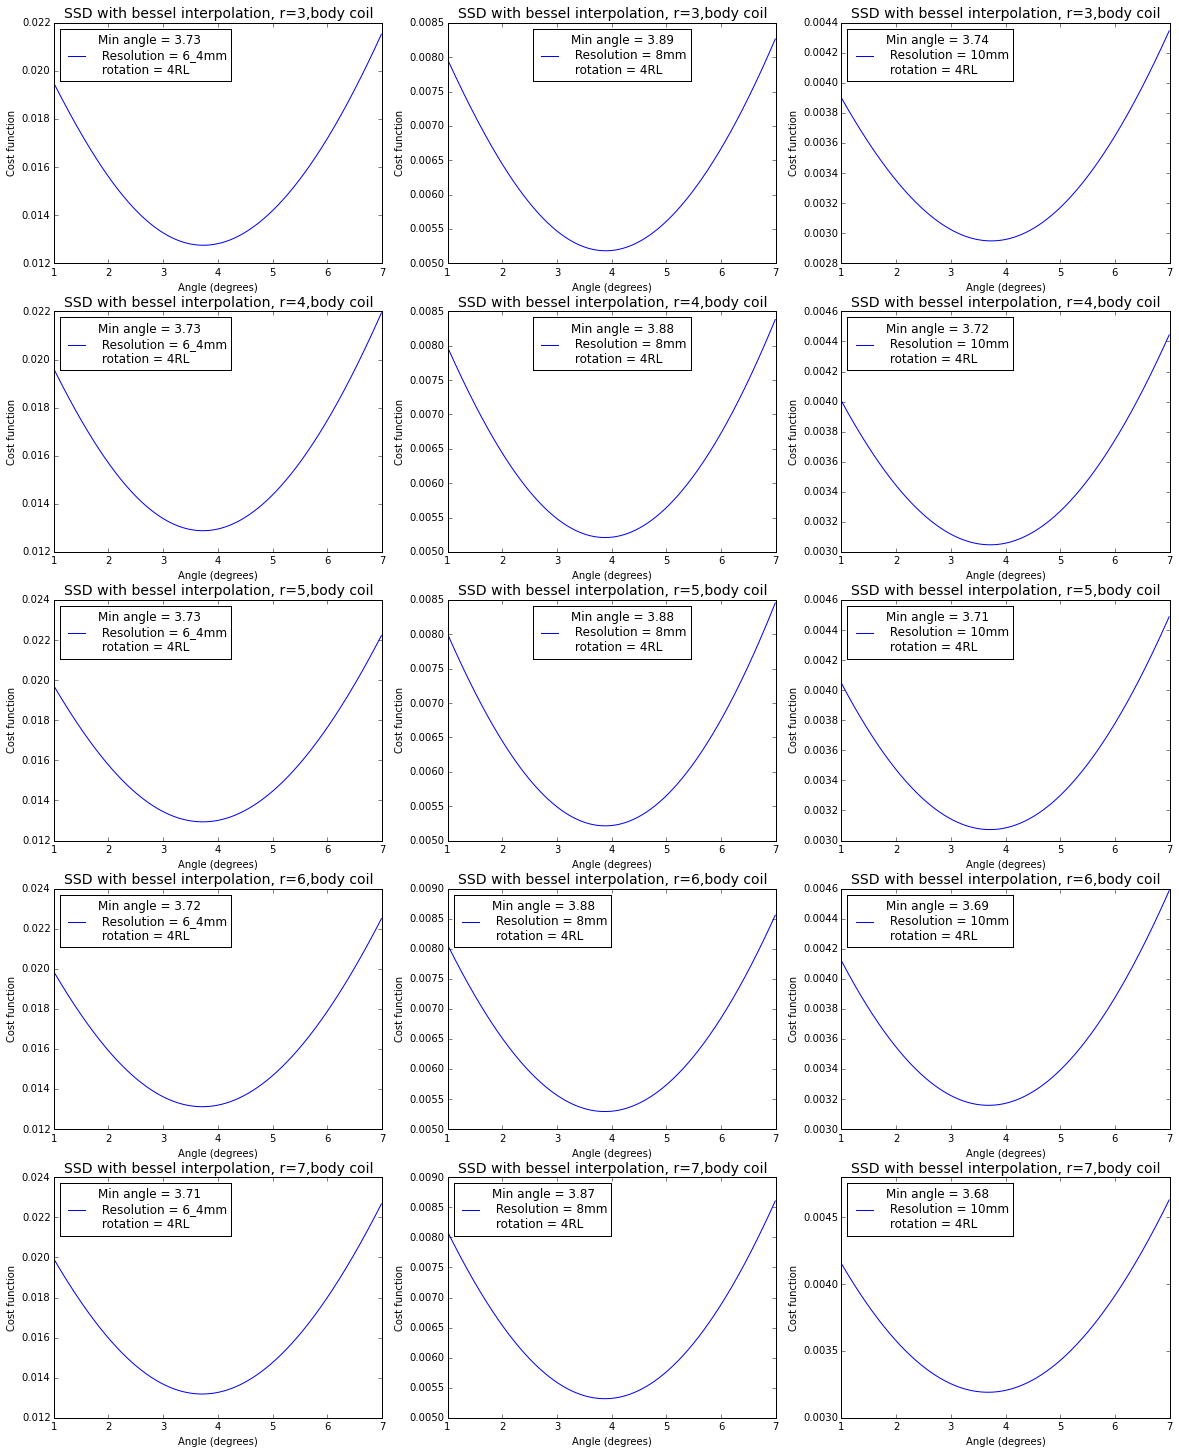

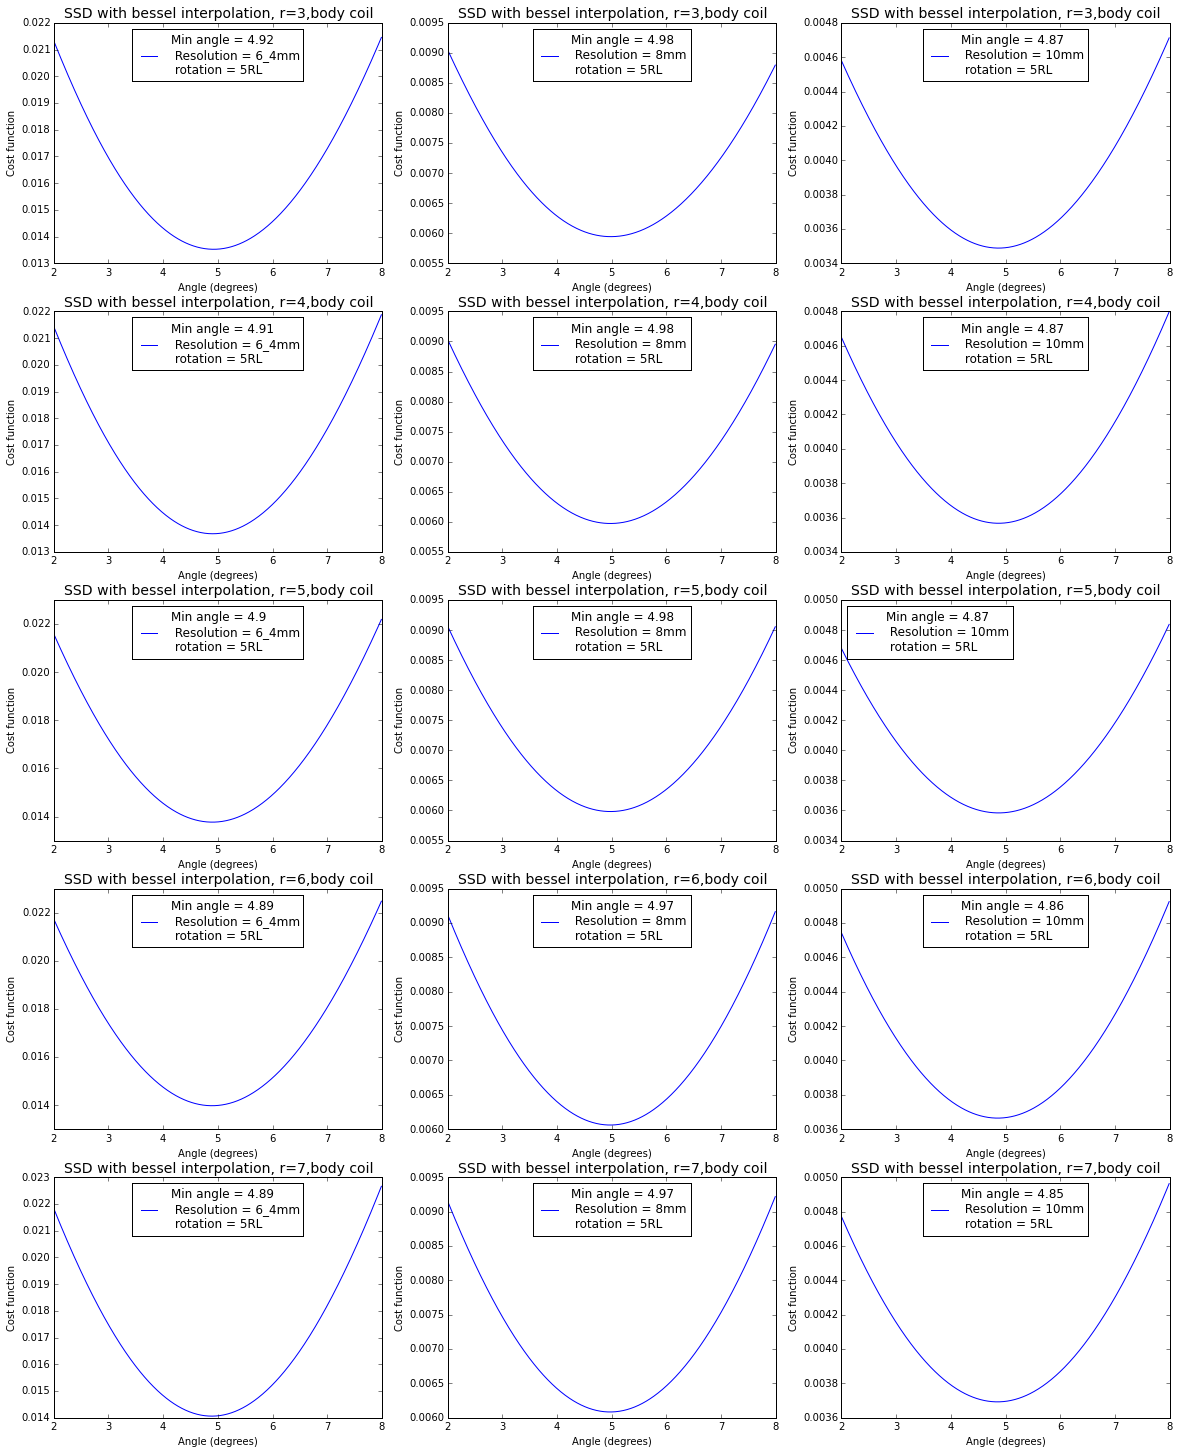

In [67]:
resolutions = ['6_4mm','8mm','10mm']
for idx in xrange(len(cost_dict_head_r_3)):
    plt.figure(figsize=[20,25])
    for i, res in enumerate(resolutions):
        rot = cost_dict_head_r_3[idx][res].keys()[0]
        d = float(rot[:-2])
        thetas = np.arange(d-3,d+3,0.01)
        plt.subplot(5,3,i+1)
        plot_cost_func(thetas, cost_dict_head_r_3[idx][res][rot], res, 'bessel', rot, 'r=3,body')
        plt.subplot(5,3,i+4)
        plot_cost_func(thetas, cost_dict_head_r_4[idx][res][rot], res, 'bessel', rot, 'r=4,body')
        plt.subplot(5,3,i+7)
        plot_cost_func(thetas, cost_dict_head_r_5[idx][res][rot], res, 'bessel', rot, 'r=5,body')
        plt.subplot(5,3,i+10)
        plot_cost_func(thetas, cost_dict_head_r_6[idx][res][rot], res, 'bessel', rot, 'r=6,body')
        plt.subplot(5,3,i+13)
        plot_cost_func(thetas, cost_dict_head_r_7[idx][res][rot], res, 'bessel', rot, 'r=7,body')
    plt.show()

# Bessel Interpolation with Halton Sampling

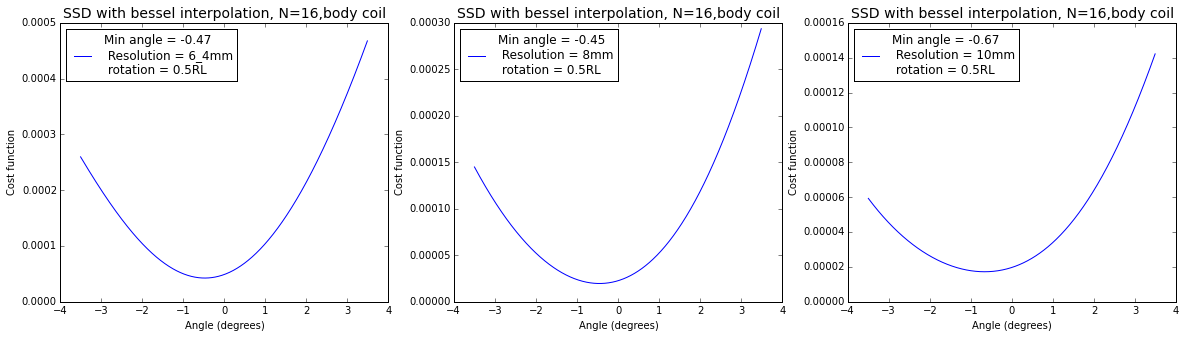

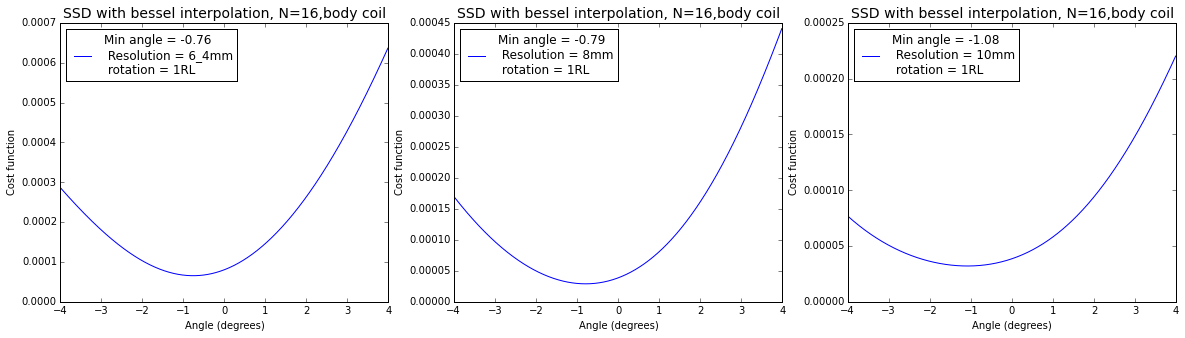

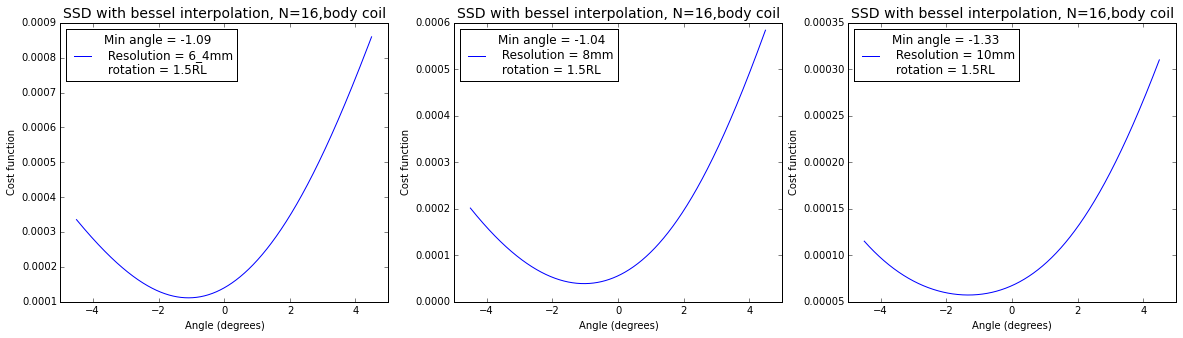

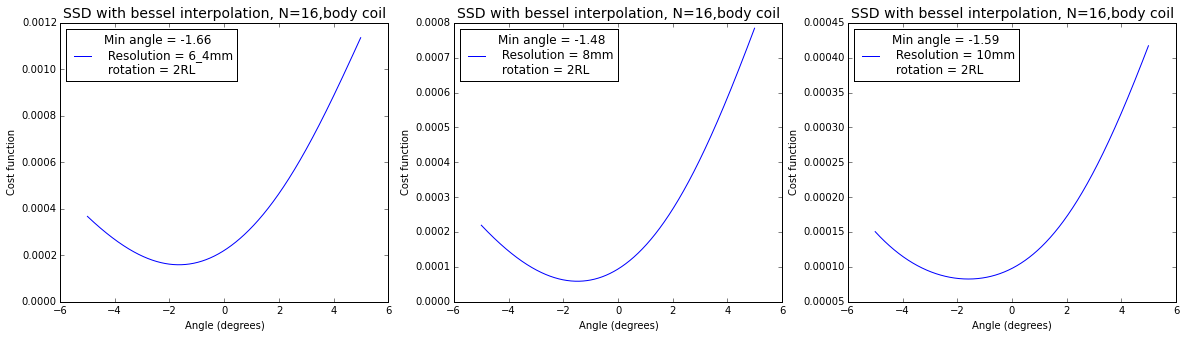

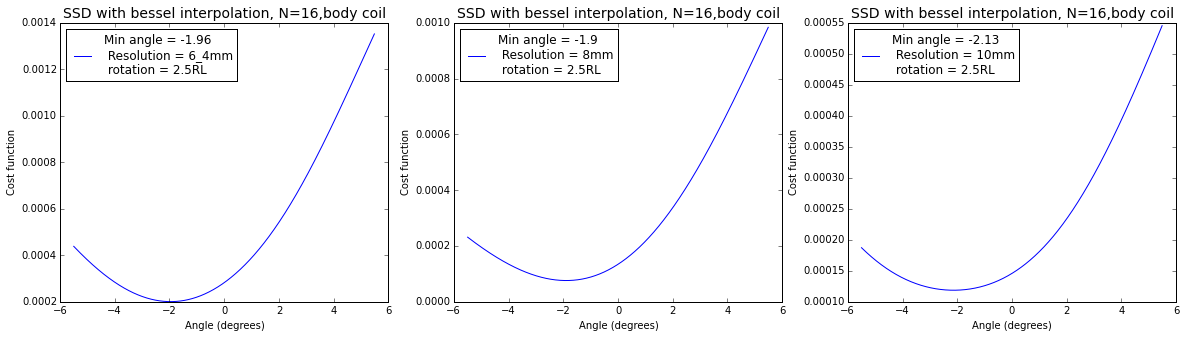

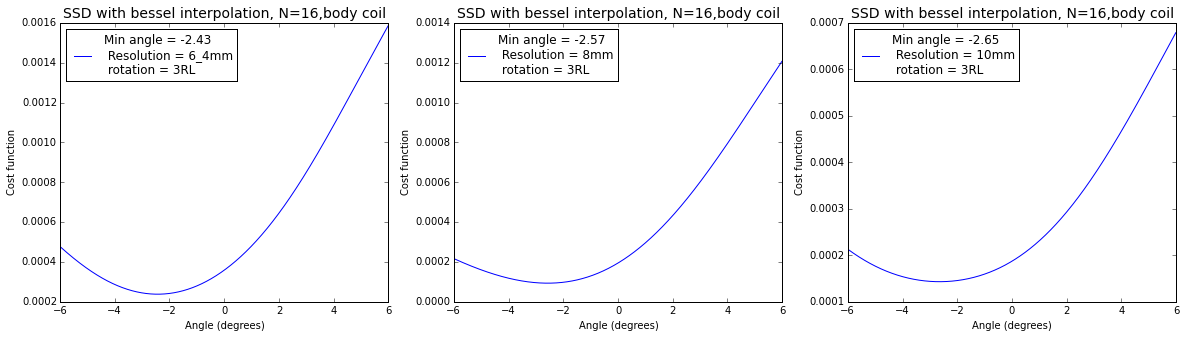

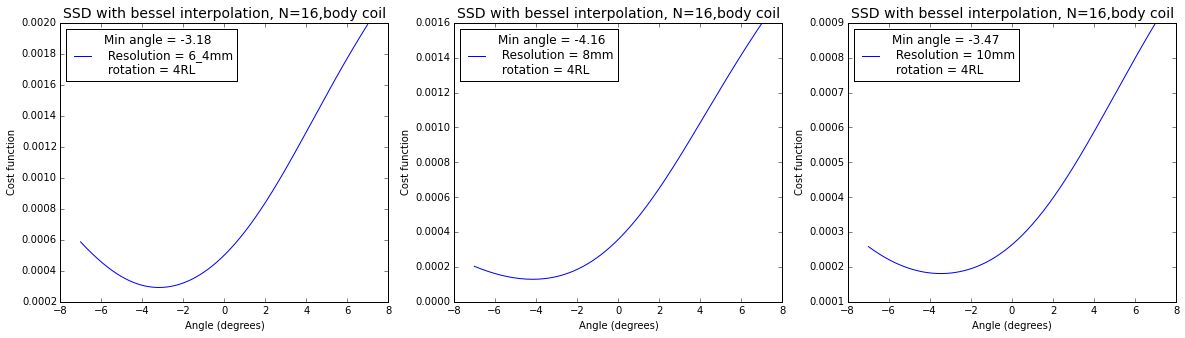

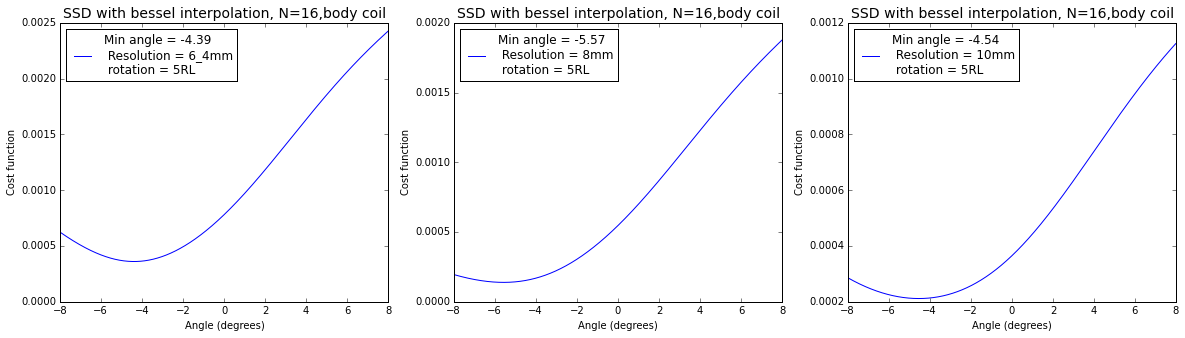

In [109]:
# Without Hann Window
cost_halton_N16 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/head_halton_N16','rb'))
cost_halton_N256 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/head_halton_N256','rb'))
resolutions = ['6_4mm','8mm','10mm']
for idx in xrange(len(cost_halton_N16)):
    plt.figure(figsize=[20,10])
    for i, res in enumerate(resolutions):
        rot = cost_halton_N16[idx][res].keys()[0]
        d = float(rot[:-2])
        thetas = np.arange(-d-3,d+3,0.01)
        plt.subplot(2,3,i+1)
        plot_cost_func(thetas, cost_halton_N16[idx][res][rot], res, 'bessel', rot, 'N=16,body')
        thetas = np.arange(-d-3,-d+3,0.01)
        plt.subplot(2,3,i+4)
        plot_cost_func(thetas, cost_halton_N256[idx][res][rot], res, 'bessel', rot, 'N=256,body')
    plt.show()

In [ ]:
# Hann Windowed
cost_halton_hann_N16 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/head_halton_hann_N16.p','rb'))
cost_halton_hann_N256 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/head_halton_hann_N256.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
for idx in xrange(len(cost_halton_hann_N16)):
    plt.figure(figsize=[20,10])
    for i, res in enumerate(resolutions):
        rot = cost_halton_hann_N16[idx][res].keys()[0]
        d = float(rot[:-2])
        thetas = np.arange(-d-3,-d+3,0.01)
        plt.subplot(2,3,i+1)
        plot_cost_func(thetas, cost_halton_hann_N16[idx][res][rot], res, 'bessel', rot, 'N=16,body')
        plt.subplot(2,3,i+4)
        plot_cost_func(thetas, cost_halton_hann_N256[idx][res][rot], res, 'bessel', rot, 'N=256,body')
    plt.show()

In [103]:
res = '6_4mm'
rot = '5RL'
testVol1Masked = sphere_mask(data_dict_head['run_1'][res]['iso'], 16)
testVol2Masked = sphere_mask(data_dict_head['run_1'][res][rot], 16)